In [1]:
from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

In [2]:
%matplotlib notebook
import control as control
import ipywidgets as widgets
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## Pólus, zérus és rendszer válasz

Rendszerek elemzése és tervezése során fontos az átviteli függvényt és a bemenő jelet (pontosabban annak Laplace transzformáltját) egyaránt figyelembe venni.

Például, az $Y(s)=\frac{1}{s(s+1)(s+2)}$ kimenet megkapható, ha $P_1(s)=\frac{1}{(s+1)(s+2)}$ átviteli függvényű rendszerre $X_1(s)=\frac{1}{s}$ bemenetet kapcsolunk, vagy ha $P_2(s)=\frac{1}{s(s+1)}$ átviteli függvényre $X_2(s)=\frac{1}{s+2}$ bemenő jelet.

Ezt a tulajdonságot az alábbi ábra mutatja be. Továbbá megfigyelhető a zérusok és pólusok elhelyezkedése és a hatásuk a rendszer kimenetére.

### Hogyan kezelhető a példa?

- Négy különböző rendszer között válthat (alsó ábra).
- A csúszkák segítségével meghatározhajta a rendszer és a bemeneti függvény $a$, $b$, $c$ és $d$ együtthatóit.

---

<table>
    <tr>
        <th style="text-align:center">Rendszer 1</th>
        <th style="text-align:center">Rendszer 2</th>
        <th style="text-align:center">Rendszer 3</th>
        <th style="text-align:center">Rendszer 4</th>
    </tr>
    <tr>
        <td><img src='img\pole-zero-system1.png'></td>
        <td><img src='img\pole-zero-system2.png'></td>
        <td><img src='img\pole-zero-system3.png'></td>
        <td><img src='img\pole-zero-system4.png'></td>        
    </tr>
    <tr>
    </tr>    
</table>

<IPython.core.display.Javascript object>


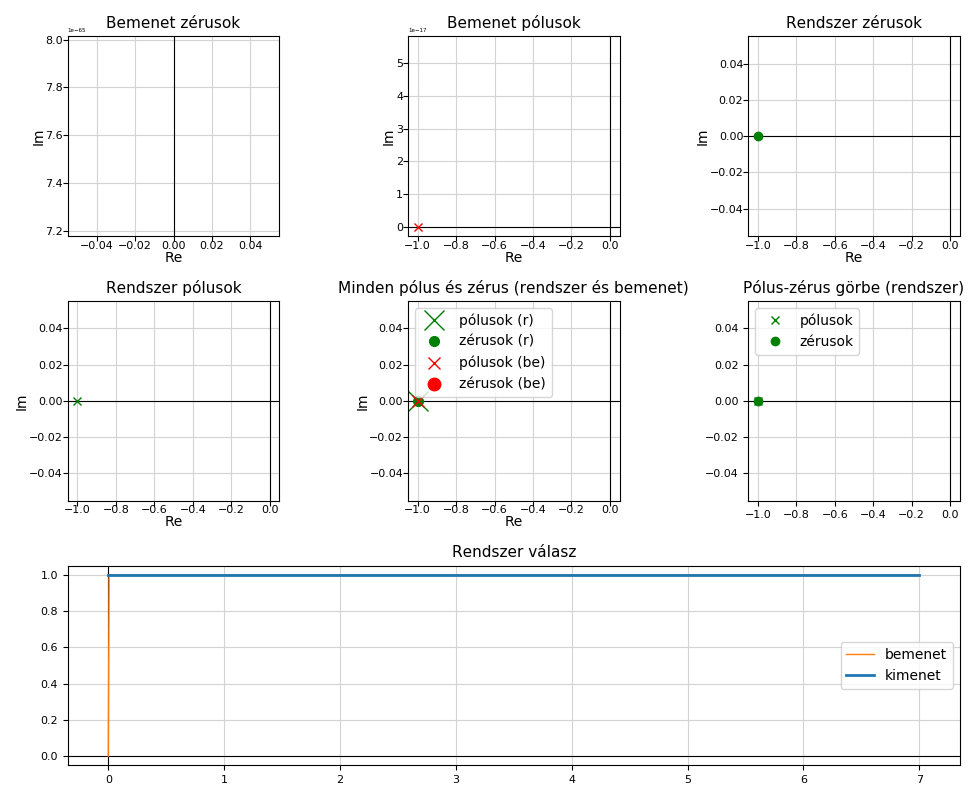

Output()

In [3]:
# Create figure and define the six subplots (2x3)

fig1 = plt.figure()
gs=GridSpec(3,3,figure=fig1)

f1_1=fig1.add_subplot(gs[0,0])
f1_2=fig1.add_subplot(gs[0,1])
f1_3=fig1.add_subplot(gs[0,2])
f1_4=fig1.add_subplot(gs[1,0])
f1_5=fig1.add_subplot(gs[1,1])
f1_6=fig1.add_subplot(gs[1,2])
f1_7=fig1.add_subplot(gs[2,:])

# fig1, ((f1_1, f1_2, f1_3), (f1_4, f1_5, f1_6), f1_7) = plt.subplots(3,3,num=' ')
fig1.set_size_inches((9.8, 8))
fig1.set_tight_layout(True)

offset_text1 = f1_1.yaxis.get_offset_text()
offset_text1.set_size(4)
offset_text2 = f1_2.yaxis.get_offset_text()
offset_text2.set_size(4)
offset_text3 = f1_3.yaxis.get_offset_text()
offset_text3.set_size(4)
offset_text3x = f1_3.xaxis.get_offset_text()
offset_text3x.set_size(4)
offset_text4 = f1_4.yaxis.get_offset_text()
offset_text4.set_size(4)
offset_text5 = f1_5.yaxis.get_offset_text()
offset_text5.set_size(4)
offset_text6 = f1_6.yaxis.get_offset_text()
offset_text6.set_size(4)
offset_text6 = f1_7.yaxis.get_offset_text()
offset_text6.set_size(4)

# Initialize the subplots
f1_line1, = f1_1.plot([], [])
f1_line2, = f1_2.plot([],[])
f1_line3, = f1_3.plot([], [])
f1_line4, = f1_4.plot([], [])  
f1_line5a, = f1_5.plot([], [])
f1_line5b, = f1_5.plot([], [])
f1_line5c, = f1_5.plot([], [])
f1_line5d, = f1_5.plot([], [])
f1_line6a, = f1_6.plot([], [])
f1_line6b, = f1_6.plot([], [])
f1_line7a, = f1_7.plot([], [])
f1_line7b, = f1_7.plot([], [])

# Titles, labels, ticks, lines
f1_1.set_title('Bemenet zérusok', fontsize=11)
f1_1.set_xlabel('Re', labelpad=0, fontsize=10)
f1_1.set_ylabel('Im', labelpad=0, fontsize=10)
f1_1.tick_params(axis='both', which='both', pad=0, labelsize=8)
f1_1.axes.axhline(y=0,lw=0.8,color='k')
f1_1.axes.axvline(x=0,lw=0.8,color='k')

f1_2.set_title('Bemenet pólusok', fontsize=11)
f1_2.set_xlabel('Re', labelpad=0, fontsize=10)
f1_2.set_ylabel('Im', labelpad=0, fontsize=10)
f1_2.tick_params(axis='both', which='both', pad=0, labelsize=8)
f1_2.axes.axhline(y=0,lw=0.8,color='k')
f1_2.axes.axvline(x=0,lw=0.8,color='k')

f1_3.set_title('Rendszer zérusok', fontsize=11)
f1_3.set_xlabel('Re', labelpad=0, fontsize=10)
f1_3.set_ylabel('Im', labelpad=0, fontsize=10)
f1_3.tick_params(axis='both', which='both', pad=0, labelsize=8)
f1_3.axes.axhline(y=0,lw=0.8,color='k')
f1_3.axes.axvline(x=0,lw=0.8,color='k')

f1_4.set_title('Rendszer pólusok', fontsize=11)
f1_4.set_xlabel('Re', labelpad=0, fontsize=10)
f1_4.set_ylabel('Im', labelpad=0, fontsize=10)
f1_4.tick_params(axis='both', which='both', pad=0, labelsize=8)
f1_4.axes.axhline(y=0,lw=0.8,color='k')
f1_4.axes.axvline(x=0,lw=0.8,color='k')

f1_5.set_title('Minden pólus és zérus (rendszer és bemenet)', fontsize=11)
f1_5.set_xlabel('Re', labelpad=0, fontsize=10)
f1_5.set_ylabel('Im', labelpad=0, fontsize=10)
f1_5.tick_params(axis='both', which='both', pad=0, labelsize=8)
f1_5.axes.axhline(y=0,lw=0.8,color='k')
f1_5.axes.axvline(x=0,lw=0.8,color='k')

f1_6.set_title('Pólus-zérus görbe (rendszer)', fontsize=11)
f1_6.set_xlabel('', labelpad=0, fontsize=10)
f1_6.set_ylabel('', labelpad=0, fontsize=10)
f1_6.tick_params(axis='both', which='both', labelsize=8)
f1_6.axes.axhline(y=0,lw=0.8,color='k')
f1_6.axes.axvline(x=0,lw=0.8,color='k')

f1_7.set_title('Rendszer válasz', fontsize=11)
f1_7.set_xlabel('', labelpad=0, fontsize=10)
f1_7.set_ylabel('', labelpad=0, fontsize=10)
f1_7.tick_params(axis='both', which='both', labelsize=8)
f1_7.axes.axhline(y=0,lw=0.8,color='k')
f1_7.axes.axvline(x=0,lw=0.8,color='k')

# # Define the appearance of the grid
f1_1.grid(which='both', axis='both', color='lightgray')
f1_2.grid(which='both', axis='both', color='lightgray')
f1_3.grid(which='both', axis='both', color='lightgray')
f1_4.grid(which='both', axis='both', color='lightgray')
f1_5.grid(which='both', axis='both', color='lightgray')
f1_6.grid(which='both', axis='both', color='lightgray')
f1_7.grid(which='both', axis='both', color='lightgray')

# Buttons for toggling between different models
style = {'description_width': 'initial'} # style for description length

modelSelect = widgets.ToggleButtons(
    options=[('Rendszer 1',0),('Rendszer 2',1),('Rendszer 3',2),('Rendszer 4',3)],
    description='Típus: ', style=style) # define toggle buttons
    
def build_model(a,b,c,d,model):

    if model==0:  
        zeros_in=np.roots([1])
        poles_in=np.roots([1,a])
        zeros_sys=np.roots([1])
        poles_sys=np.roots([1,b])
        W_sys=control.tf(np.array([1]),np.array([1,b]))
        tout, yout = control.step_response(W_sys)
    elif model==1:
        zeros_in=np.roots([1])
        poles_in=np.roots([1,a])
        zeros_sys=np.roots([1,b])
        poles_sys=np.roots([1,c])
        W_sys=control.tf(np.array([1,b]),np.array([1,c]))
        tout, yout = control.step_response(W_sys)
    elif model==2:
        zeros_in=np.roots([1])
        poles_in=np.roots([1,a])
        zeros_sys=np.roots([1,b])
        poles_sys=np.roots([1,c,d])
        W_sys=control.tf(np.array([1,b]),np.array([1,c,d]))
        tout, yout = control.step_response(W_sys)
    elif model==3:
        zeros_in=np.roots([1,c])
        poles_in=np.roots([1,2*a,a^2+b^2])
        zeros_sys=np.roots([1])
        poles_sys=np.roots([1,d])   
        W_sys=control.tf(np.array([1,c]),np.array([1,d]))
        tout, yout = control.step_response(W_sys)
    
    global f1_line1, f1_line2, f1_line3, f1_line4, f1_line5a, f1_line5b, f1_line5c, f1_line5d, f1_line6a, f1_line6b, f1_line7a, f1_line7b
    
    f1_1.lines.remove(f1_line1)
    f1_2.lines.remove(f1_line2)
    f1_3.lines.remove(f1_line3)
    f1_4.lines.remove(f1_line4)
    f1_5.lines.remove(f1_line5a), f1_5.lines.remove(f1_line5b), f1_5.lines.remove(f1_line5c), f1_5.lines.remove(f1_line5d) 
    f1_6.lines.remove(f1_line6a), f1_6.lines.remove(f1_line6b)
    f1_7.lines.remove(f1_line7a), f1_7.lines.remove(f1_line7b)    
    
    if zeros_in.size>0:
        f1_line1, = f1_1.plot(np.real(zeros_in),np.imag(zeros_in),'og')
    else:
        f1_line1, = f1_1.plot([],[])    
    f1_line2, = f1_2.plot(np.real(poles_in),np.imag(poles_in),'xr')
    if zeros_sys.size>0:
        f1_line3, = f1_3.plot(np.real(zeros_sys),np.imag(zeros_sys),'og')
    else: 
        f1_line3, = f1_3.plot([],[])
    f1_line4, = f1_4.plot(np.real(poles_sys),np.imag(poles_sys),'xg')
    f1_line5a, = f1_5.plot(np.real(poles_sys),np.imag(poles_sys),'xg',label='pólusok (r)',markersize=15)
    f1_line5b, = f1_5.plot(np.real(zeros_sys),np.imag(zeros_sys),'og',label='zérusok (r)',markersize=7)
    f1_line5c, = f1_5.plot(np.real(poles_in),np.imag(poles_in),'xr',label='pólusok (be)',markersize=8)
    f1_line5d, = f1_5.plot(np.real(zeros_in),np.imag(zeros_in),'or',label='zérusok (be)',markersize=9)
    f1_5.legend()
    f1_line6a, = f1_6.plot(np.real(poles_sys),np.imag(poles_sys),'xg',label='pólusok')
    f1_line6b, = f1_6.plot(np.real(zeros_sys),np.imag(zeros_sys),'og',label='zérusok')
    f1_6.legend()
    tstep=np.linspace(0,tout[-1],1000)
    u = np.ones_like(tstep)
    u[0]=0
    f1_line7b, = f1_7.plot(tstep,u,color='C1',label='bemenet',linewidth=1)
    f1_line7a, = f1_7.plot(tout,yout,color='C0',label='kimenet',linewidth=2)
    f1_7.legend()
       
    f1_1.relim(), f1_2.relim(), f1_3.relim(), f1_4.relim(), f1_5.relim(), f1_6.relim(), f1_7.relim()
    f1_1.autoscale_view(), f1_2.autoscale_view(), f1_3.autoscale_view(), f1_4.autoscale_view(), f1_5.autoscale_view(), f1_6.autoscale_view(), f1_7.autoscale_view()
    
    f1_1.ticklabel_format(axis='both',useOffset=False)
def update_sliders(model):
    
    global a_slider, b_slider, c_slider, d_slider
    
    aval = [1, 1, 1, 1]
    bval = [1, 1, 1, 1]
    cval = [1, 1, 1, 1]
    dval = [1, 1, 1, 1]
    
    a_slider.value = aval[model]
    b_slider.value = bval[model]
    c_slider.value = cval[model]
    d_slider.value = dval[model]    
    
def create_sliders(model):
    
    global a_slider, b_slider, c_slider, d_slider
    
    a_slider = widgets.IntSlider(value=1,min=-10, max=10,description='a: ',
                                 continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
    b_slider = widgets.IntSlider(value=1,min=-10, max=10,description='b: ',
                                 continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
    
    if model==0:
        c_slider = widgets.IntSlider(value=1,min=-10, max=10,description='c: ',
                                 disabled=True, continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
        d_slider = widgets.IntSlider(value=1,min=-10, max=10,description='d: ',
                                 disabled=True, continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
    elif model==1:
        c_slider = widgets.IntSlider(value=1,min=-10, max=10,description='c: ',
                                 continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
        d_slider = widgets.IntSlider(value=1,min=-10, max=10,description='d: ',
                                 disabled=True, continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
    else:
        c_slider = widgets.IntSlider(value=1,min=-10, max=10,description='c: ',
                                 continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
        d_slider = widgets.IntSlider(value=1,min=-10, max=10,description='d: ',
                                 continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
        
    input_data=widgets.interactive_output(build_model, {'a':a_slider, 'b':b_slider, 'c':c_slider, 'd':d_slider, 'model':modelSelect})
      
    input_data2=widgets.interactive_output(update_sliders, {'model':modelSelect})
    
    display(modelSelect,input_data2)
    
    display(widgets.HBox([widgets.VBox([a_slider, b_slider], layout=widgets.Layout(width='45%')),
                    widgets.VBox([c_slider, d_slider], layout=widgets.Layout(width='45%'))]), input_data)       
widgets.interactive_output(create_sliders, {'model':modelSelect})